In [798]:
#Project for Quantitative Criticism Lab (UT Austin)
#Elias Sanchez

import pandas as pd
import numpy as np
import csv
import math as m
import matplotlib.pyplot as plt

In [463]:
# Converts WALS coordinate data n to nearest n.25 or n.75 in order to search for classification
def rco(num):
    n = num-int(num)
    if n<=0.5:
        return (int(num)+ 0.25)
    else:
        return(int(num)+0.75)

In [464]:
#Auxilary binary search function
def binary(alist, item):
    if len(alist) == 0:
        return (-1)
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
          return (midpoint)
        else:
          if item<alist[midpoint]:
            return binary(alist[:midpoint],item)
          else:
            return binary(alist[midpoint+1:],item)

In [465]:
lang_df = pd.read_csv('language.csv', encoding = 'ISO-8859-1')

In [466]:
#koppen_1901-2010.tsv contains a file with latitude and longitudes that are close to .25 and .75 that gives the climate
koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)

In [467]:
#Translate longitude and latitude to Climate use binary search to look for num. coordinates
Clim = []
for i in range(0, len(lang_df)):
    s = 0
    if rco(lang_df['longitude'][i]) == -179.75:
        s = 0
    else:
        #binary search in first columns
        long = rco(lang_df['longitude'][i]) - 0.5
        s = binary(koppen['longitude'],long)
    
    if s==-1:
            Clim.append(str("NaN"))
            print(i)
    else:
        j=s
        lat = rco(lang_df['latitude'][i])
        lon = rco(lang_df['longitude'][i])
        
        while bool(lat == koppen['latitude'][j] and lon== koppen['longitude'][j])==False and bool(koppen['longitude'][j]< lon+1)==True:
            j=j+1
            if j== len(koppen['latitude'])-1:
                break
        
        if rco(lang_df['latitude'][i])== koppen['latitude'][j] and rco(lang_df['longitude'][i])==koppen['longitude'][j]:
            Clim.append(str(koppen['p1901_2010'][j]))
        else:
            Clim.append("NaN")
                                                                       
        

In [598]:
k = np.asarray(Clim)
#lang_df["Climate"] = k
# drop languages that where unale to be classified with Koppen

In [683]:
#Testing features on Phonology Area 
df1 = lang_df[lang_df['1A_Consonant_Inventories'].notnull() & lang_df['2A_Vowel_Quality_Inventories'].notnull() & lang_df['3A_Consonant-Vowel_Ratio'].notnull() & lang_df['4A_Voicing_in_Plosives_and_Fricatives'].notnull()& lang_df['13A_Tone'].notnull() 
& lang_df['18A_Absence_of_Common_Consonants'].notnull() & lang_df['7A_Glottalized_Consonants'].notnull() & lang_df['8A_Lateral_Consonants'].notnull() & lang_df['9A_The_Velar_Nasal'].notnull()& lang_df['10A_Vowel_Nasalization'].notnull()]
features = ['1A_Consonant_Inventories', '2A_Vowel_Quality_Inventories', '3A_Consonant-Vowel_Ratio', '4A_Voicing_in_Plosives_and_Fricatives', '13A_Tone', '18A_Absence_of_Common_Consonants', '7A_Glottalized_Consonants', '8A_Lateral_Consonants', '9A_The_Velar_Nasal', '10A_Vowel_Nasalization']
col = ['Name', '1A_Consonant_Inventories', '2A_Vowel_Quality_Inventories', '3A_Consonant-Vowel_Ratio', '4A_Voicing_in_Plosives_and_Fricatives', '13A_Tone', '18A_Absence_of_Common_Consonants', '7A_Glottalized_Consonants', '8A_Lateral_Consonants', '9A_The_Velar_Nasal', '10A_Vowel_Nasalization', 'Climate']

In [738]:
#Basic Ststistic - Distribution of Climate languages
lang_df['Climate']
A=0
B=0
C=0
D=0
E=0
Cl= pd.Series.tolist(lang_df['Climate'])
for i in range(0,len(Cl)):
    if Cl[i][2] == 'A':
        A+=1
    elif Cl[i][2] == 'B':
        B+=1
    elif Cl[i][2] == 'C':
        C+=1
    elif Cl[i][2] == 'D':
        D+=1
    elif Cl[i][2] == 'E':
        E+=1
print("A - Tropical: " + str(A) )
print("B - Arid: " + str(B) )
print("C - Temperate: " + str(C) )
print("D - Cold: " + str(D) )
print("E - Polar: " + str(E) )

A - Tropical: 1036
B - Arid: 344
C - Temperate: 553
D - Cold: 234
E - Polar: 68


In [ ]:
#Pre-processing  - features into numeric values

f1 = df1['1A_Consonant_Inventories'].str[0]
f1 = pd.to_numeric(f1)
f2 = df1['2A_Vowel_Quality_Inventories'].str[0]
f2 = pd.to_numeric(f2)
f3 = df1['3A_Consonant-Vowel_Ratio'].str[0]
f3 = pd.to_numeric(f3)
f4 = df1['4A_Voicing_in_Plosives_and_Fricatives'].str[0]
f4 = pd.to_numeric(f4)
f5 = df1['13A_Tone'].str[0]
f5 = pd.to_numeric(f5)
                   
f6 = df1['18A_Absence_of_Common_Consonants'].str[0]
f6 = pd.to_numeric(f6)
f7 = df1['7A_Glottalized_Consonants'].str[0]
f7 = pd.to_numeric(f7)
f8 = df1['8A_Lateral_Consonants'].str[0]
f8 = pd.to_numeric(f8)
f9 = df1['9A_The_Velar_Nasal'].str[0]
f9 = pd.to_numeric(f9)
f10 = df1['10A_Vowel_Nasalization'].str[0]
f10 = pd.to_numeric(f10)

#convert all series to list data structures
f1 = pd.Series.tolist(f1)
f2 = pd.Series.tolist(f2)
f3 = pd.Series.tolist(f3)
f4 = pd.Series.tolist(f4)
f5 = pd.Series.tolist(f5)
f6 = pd.Series.tolist(f6)
f7 = pd.Series.tolist(f7)
f8 = pd.Series.tolist(f8)
f9 = pd.Series.tolist(f9)
f10 = pd.Series.tolist(f10)



In [797]:
#Matrix of features - turn series into an array of samples, where each list consist of different types of languages
X = []
f1 = pd.Series.tolist(f1)
for i in range(0, len(f1)):
    X.append([])
for i in range(0, len(f1)):
    X[i].append(f1[i])
    X[i].append(f2[i])
    X[i].append(f3[i])
    X[i].append(f4[i])
    X[i].append(f5[i])
    X[i].append(f6[i])
    X[i].append(f7[i])
    X[i].append(f8[i])
    X[i].append(f9[i])
    X[i].append(f10[i])
print(len(X))

128


In [599]:
#Label Encoding
#Convert koppen classification columns into numerical category by first letter
Y = pd.Series.tolist(df1['Climate'])
for i in range(0,len(Y)):
    if Y[i][2] == 'A':
        Y[i] = 1
    elif Y[i][2] == 'B':
        Y[i] = 2
    elif Y[i][2] == 'C':
        Y[i] = 3
    elif Y[i][2] == 'D':
        Y[i] = 4
    elif Y[i][2] == 'E':
        Y[i] = 5

In [604]:
#run SVC - One-vs.-rest
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

classif = OneVsRestClassifier(estimator=SVC(random_state=0))

pred = classif.fit(X, Y).predict(X)


In [693]:
#confusion matrix for SVC
y_actu = pd.Series(Y, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,43,1,1,0,0
2,12,10,5,0,0
3,7,2,22,3,0
4,6,0,4,8,0
5,0,0,0,0,4


In [610]:
#Normalized confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,1,2,3,4,5
Actual,,,,,
1,0.955556,0.037037,0.029412,0.000000,0.0
2,0.266667,0.370370,0.147059,0.000000,0.0
3,0.155556,0.074074,0.647059,0.166667,0.0
4,0.133333,0.000000,0.117647,0.444444,0.0
5,0.000000,0.000000,0.000000,0.000000,1.0


In [785]:
#Simple accuracy measurement
c=0
for i in range(0, len(Y)):
    if Y[i]== pred[i]:
        c=c+1
c/len(Y)
    

0.6796875

In [622]:
#Cohen's Kappa Score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_actu, y_pred)

0.55033844572016111

In [712]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split


In [764]:
train_x, test_x, train_y, test_y = train_test_split(X,Y)

In [765]:
def RFC (features, target):
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return (clf)

In [766]:
trained_model = RFC(train_x, train_y)
trained_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [767]:
predictions = trained_model.predict(test_x)
print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))

Train Accuracy ::  0.916666666667
Test Accuracy  ::  0.3125


In [768]:
#Confusion matrix for tested sample
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,2,3,4
Actual,,,,
1,7,2,1,1
2,1,2,2,2
3,3,3,1,3
4,1,0,1,0
5,0,0,2,0


Feature ranking:
1. feature 0 - 1A_Consonant_Inventories (0.155186)
2. feature 3 - 4A_Voicing_in_Plosives_and_Fricatives (0.145314)
3. feature 4 - 13A_Tone (0.122854)
4. feature 2 - 3A_Consonant-Vowel_Ratio (0.119746)
5. feature 7 - 8A_Lateral_Consonants (0.109429)
6. feature 8 - 9A_The_Velar_Nasal (0.102054)
7. feature 1 - 2A_Vowel_Quality_Inventories (0.096448)
8. feature 6 - 7A_Glottalized_Consonants (0.077270)
9. feature 9 - 10A_Vowel_Nasalization (0.039785)
10. feature 5 - 18A_Absence_of_Common_Consonants (0.031914)
[0 3 4 2 7 8 1 6 9 5]


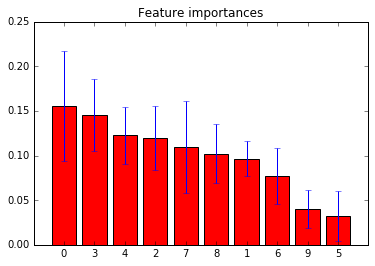

In [807]:
#Feature Importance
importances = trained_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

X = np.asarray(X)

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))
    
print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [808]:
#PREPROCCESSING FOR MORPHOLOGY
#Same classification procedure for 8 Morphology Features - 23A, 24A, 25A, 25B, 26A, 27A, 28A, 29A
df2 = lang_df[lang_df['23A_Locus_of_Marking_in_the_Clause'].notnull() & lang_df['24A_Locus_of_Marking_in_Possessive_Noun_Phrases'].notnull() & lang_df['25A_Locus_of_Marking:_Whole-language_Typology'].notnull() & lang_df['25B_Zero_Marking_of_A_and_P_Arguments'].notnull()& lang_df['26A_Prefixing_vs._Suffixing_in_Inflectional_Morphology'].notnull() 
& lang_df['27A_Reduplication'].notnull() & lang_df['28A_Case_Syncretism'].notnull() & lang_df['29A_Syncretism_in_Verbal_Person/Number_Marking'].notnull()]

x1 = df2['23A_Locus_of_Marking_in_the_Clause'].str[0]
x1 = pd.to_numeric(x1)
x2 = df2['24A_Locus_of_Marking_in_Possessive_Noun_Phrases'].str[0]
x2 = pd.to_numeric(x2)
x3 = df2['25A_Locus_of_Marking:_Whole-language_Typology'].str[0]
x3 = pd.to_numeric(x3)
x4 = df2['25B_Zero_Marking_of_A_and_P_Arguments'].str[0]
x4 = pd.to_numeric(x4)
x5 = df2['26A_Prefixing_vs._Suffixing_in_Inflectional_Morphology'].str[0]
x5 = pd.to_numeric(x5)                
x6 = df2['27A_Reduplication'].str[0]
x6 = pd.to_numeric(x6)
x7 = df2['28A_Case_Syncretism'].str[0]
x7 = pd.to_numeric(x7)
x8 = df2['29A_Syncretism_in_Verbal_Person/Number_Marking'].str[0]
x8 = pd.to_numeric(x8)

features = ['23A_Locus_of_Marking_in_the_Clause','24A_Locus_of_Marking_in_Possessive_Noun_Phrases','25A_Locus_of_Marking:_Whole-language_Typology','25B_Zero_Marking_of_A_and_P_Arguments','26A_Prefixing_vs._Suffixing_in_Inflectional_Morphology','27A_Reduplication','28A_Case_Syncretism','29A_Syncretism_in_Verbal_Person/Number_Marking']
#convert all series to list data structures
x1 = pd.Series.tolist(x1)
x2 = pd.Series.tolist(x2)
x3 = pd.Series.tolist(x3)
x4 = pd.Series.tolist(x4)
x5 = pd.Series.tolist(x5)
x6 = pd.Series.tolist(x6)
x7 = pd.Series.tolist(x7)
x8 = pd.Series.tolist(x8)

F = []
for i in range(0, len(x1)):
    F.append([])
for i in range(0, len(x1)):
    F[i].append(x1[i])
    F[i].append(x2[i])
    F[i].append(x3[i])
    F[i].append(x4[i])
    F[i].append(x5[i])
    F[i].append(x6[i])
    F[i].append(x7[i])
    F[i].append(x8[i])
    
P = pd.Series.tolist(df2['Climate'])
for i in range(0,len(P)):
    if P[i][2] == 'A':
        P[i] = 1
    elif P[i][2] == 'B':
        P[i] = 2
    elif P[i][2] == 'C':
        P[i] = 3
    elif P[i][2] == 'D':
        P[i] = 4
    elif P[i][2] == 'E':
        P[i] = 5

In [781]:
classify = OneVsRestClassifier(estimator=SVC(random_state=0))

predic = classify.fit(F, P).predict(F)


In [782]:
y_actu = pd.Series(P, name='Actual')
y_pred = pd.Series(predic, name='Predicted')
confusion = pd.crosstab(y_actu, y_pred)
confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,26,1,2,0,0
2,4,11,3,0,0
3,5,1,23,0,0
4,2,1,3,6,0
5,0,0,0,0,3


In [784]:
#Simple accuracy of SVM
c=0
for i in range(0, len(P)):
    if P[i]== predic[i]:
        c=c+1
c/len(P)


0.7582417582417582

In [795]:
train_f, test_f, train_p, test_p = train_test_split(F,P)
trained_mod = RFC(train_f, train_p)
trained_mod
features = ['','',]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [796]:
predictions = trained_mod.predict(test_f)
print("Train Accuracy :: ", accuracy_score(train_p, trained_mod.predict(train_f)))
print("Test Accuracy  :: ", accuracy_score(test_p, predictions))

Train Accuracy ::  0.897058823529
Test Accuracy  ::  0.391304347826


Feature ranking:
1. feature 5 - 26A_Prefixing_vs._Suffixing_in_Inflectional_Morphology (0.237750)
2. feature 2 - 24A_Locus_of_Marking_in_Possessive_Noun_Phrases (0.153392)
3. feature 8 - 29A_Syncretism_in_Verbal_Person/Number_Marking (0.141919)
4. feature 1 - 23A_Locus_of_Marking_in_the_Clause (0.127832)
5. feature 7 - 28A_Case_Syncretism (0.120723)
6. feature 6 - 27A_Reduplication (0.111065)
7. feature 3 - 25A_Locus_of_Marking:_Whole-language_Typology (0.102451)
8. feature 4 - 25B_Zero_Marking_of_A_and_P_Arguments (0.004868)
[4 1 7 0 6 5 2 3]


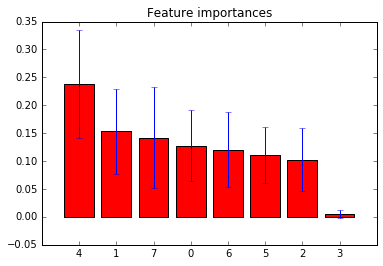

In [811]:
#Feature Importance
importances = trained_mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_mod.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

F = np.asarray(F)

for f in range(F.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f] , features[indices[f]], importances[indices[f]]))
    
print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(F.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(F.shape[1]), indices)
plt.xlim([-1, F.shape[1]])
plt.show()